In [30]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from imgaug import augmenters as iaa
import custom_augmentation as ciaa
import random

In [64]:
labels_file = json.loads(open(os.path.join('/home/linus/Desktop/final/train.json'),'r').read())
print('Numbers of sample:', len(labels_file))

Numbers of sample: 28823


In [65]:
labels_file

[{'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552725569.1256902/rgb/2_rgb.jpg',
  'index': 2,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552725569.1256902/depth/2_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552725569.1256902/rgb/4_rgb.jpg',
  'index': 4,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552725569.1256902/depth/4_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552725569.1256902/rgb/6_rgb.jpg',
  'index': 6,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552725569.1256902/depth/6_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552725569.1256902/rgb/8_rgb.jpg',
  'index': 8,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552725569.12569

Tạo và kiểm tra path cho các ảnh trong dataset thuii.

In [69]:
for index, each_sample in tqdm(enumerate(labels_file), desc='Creating full path', total=len(labels_file)):
#     rgb_img_path = os.path.join(dataset_path, 'rgb', '{}_rgb.jpg'.format(each_sample['index']))
    each_sample['rgb_img_path'] = each_sample['rgb_img_path'].replace('/home/linus/Desktop/data/','/home/linus/Desktop/final/')
    rgb_img_path = each_sample['rgb_img_path']
    if not os.path.isfile(rgb_img_path):
        print(rgb_img_path, 'not exist. Skipped')
        labels_file.remove(each_sample)
        continue
#     depth_img_path = os.path.join(dataset_path, 'depth', '{}_rgb.jpg'.format(each_sample['index']))
    each_sample['depth_img_path'] = each_sample['depth_img_path'].replace('/home/linus/Desktop/data/','/home/linus/Desktop/final/')
    depth_img_path = each_sample['depth_img_path']
    if not os.path.isfile(depth_img_path):
        print(depth_img_path, 'not exist. Skipped')
        labels_file.remove(each_sample)
        continue
#     labels_file[index]['rgb_img_path'] = rgb_img_path
#     labels_file[index]['depth_img_path'] = depth_img_path

Creating full path: 100%|██████████| 28823/28823 [00:00<00:00, 200669.64it/s]


In [70]:
labels_file

[{'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/final/dataset_1552725569.1256902/rgb/2_rgb.jpg',
  'index': 2,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/final//dataset_1552725569.1256902/depth/2_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/final/dataset_1552725569.1256902/rgb/4_rgb.jpg',
  'index': 4,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/final//dataset_1552725569.1256902/depth/4_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/final/dataset_1552725569.1256902/rgb/6_rgb.jpg',
  'index': 6,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/final//dataset_1552725569.1256902/depth/6_depth.jpg'},
 {'proximity value': True,
  'angle': -0.0,
  'rgb_img_path': '/home/linus/Desktop/final/dataset_1552725569.1256902/rgb/8_rgb.jpg',
  'index': 8,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/final//dataset_15527255

Augment để còn upsampling nhé

In [71]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [72]:
augment_object = iaa.Sequential([
    iaa.Add((-20, 20)),
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=0.03*255)),
    iaa.Sometimes(0.5, iaa.MotionBlur(angle=(0, 360))),
    iaa.Sometimes(0.2, iaa.GammaContrast(gamma=(0.5, 1.44))),
    iaa.Sometimes(0.1, iaa.FastSnowyLandscape(lightness_threshold=(0, 150))),
    iaa.OneOf([
        iaa.Sometimes(0.8, ciaa.RandomShadow()),
        iaa.Sometimes(0.4, ciaa.RandomGravel()),
        iaa.Sometimes(0.2, ciaa.RandomSunFlare()),
        iaa.Sometimes(0.3, ciaa.RandomMotionBlur())
    ])
])

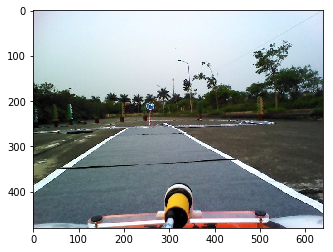

In [86]:
test_img = cv2.imread(random.choice(labels_file)['rgb_img_path'])
show_img(test_img)

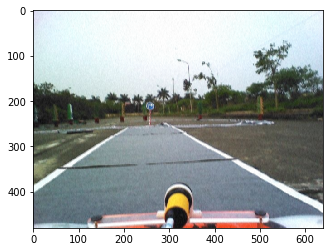

In [87]:
show_img(augment_object.augment_image(test_img))

Flip augmentation nè

-60


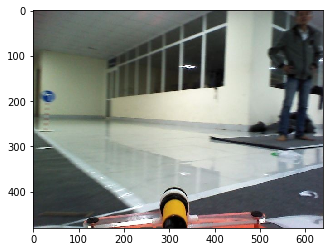

In [96]:
random_sample = random.choice(labels_file)
test_img = cv2.imread(random_sample['rgb_img_path'])
show_img(test_img)
print(random_sample['angle'])

60


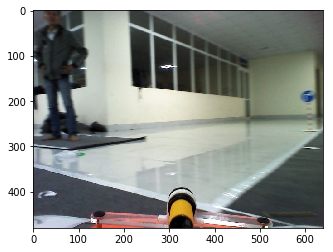

In [97]:
test_img_flip = cv2.flip(test_img, 1)
show_img(test_img_flip)
print(-random_sample['angle'])

In [98]:
def show_distribution(dataset, mode='angle'):
    list_temp = [each[mode] for each in dataset]
#     print(list_temp)
    plt.hist(list_temp)

Xem distribution của góc quay 

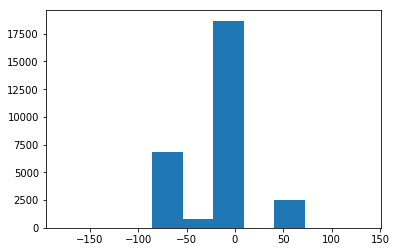

In [99]:
show_distribution(labels_file, 'angle')

Xem distribution của vận tốc

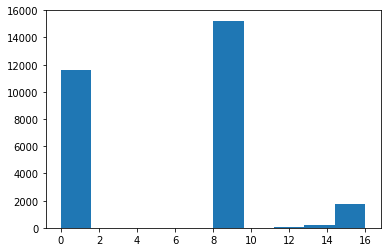

In [100]:
show_distribution(labels_file, 'speed')

Loại hết data khi xe đứng yên và lùi

Numbers of sample after remove stop: 28758


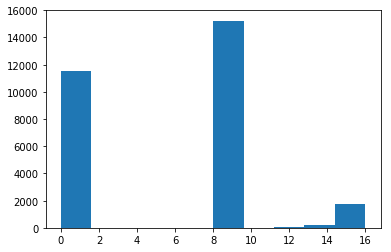

In [101]:
for index, each_sample in enumerate(labels_file):
    last_sample = [each_sample['speed'] for each_sample in labels_file[index-3:index]]
    if each_sample['speed']<=0 and all(sample for sample in last_sample if sample<=0):
        labels_file.remove(each_sample)
print('Numbers of sample after remove stop:', len(labels_file))
show_distribution(labels_file, 'speed')

Upsampling để cân distribution giữa các angle

In [105]:
def calculate_angle_amount():
    global left, right, center
    left = right = center = 0
    for each_sample in labels_file:
        if each_sample['angle'] < 0:
            left += 1
        elif each_sample['angle'] > 0:
            right += 1
        else:
            center += 1
    print('Left: {} Right: {} Center: {}'.format(left, right, center))
calculate_angle_amount()

Left: 7594 Right: 2551 Center: 18613


In [103]:
center/left

2.4510139583882014

In [104]:
center/right

7.296354370834966

In [114]:
import multiprocessing

num_worker=12
pool = multiprocessing.Pool(num_worker)

def worker(output_index):
    global each_sample
    clear_output()
    old_path = each_sample['rgb_img_path']
    org_img = cv2.imread(old_path)            
    new_img = augment_object.augment_image(org_img)
    new_path = old_path.replace('.jpg','_{}.jpg'.format(output_index))
    cv2.imwrite(new_path, new_img)
    new_sample = {
        'index': each_sample['index'],
        'rgb_img_path': new_path,
        'depth_img_path': each_sample['depth_img_path'],
        'angle': each_sample['angle'],
        'speed': each_sample['speed']
    }
    return new_sample

Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'worker' on <module '__main__'>
Process ForkPoolWorker-5:
Process ForkPoolWorker-8:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-11:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call l

In [112]:
def augment_duplicate_upsampling(dataset, src_amount, dst_amount):
    global each_sample
    new_sample_list = []
    if dst_amount/src_amount < 2:
        percent_need_upsample = int(((dst_amount-src_amount)/2)/src_amount * 100)
        multiplier = 1
    else:
        percent_need_upsample = 101
        multiplier = (dst_amount // src_amount) - 1
    for index, each_sample in tqdm(enumerate(dataset), total=len(dataset)):
        if each_sample['angle'] > 0 and random.randint(0, 100) <= percent_need_upsample:
            output_index = list(range(multiplier))
            new_sample_list = list(pool.imap(worker, output_index))
    final_data = new_sample_list + dataset
    print("Numbers of sample after upsampling: ", len(final_data))
    calculate_angle_amount()
    return final_data

In [120]:
def augment_duplicate_upsampling(dataset, src_amount, dst_amount):
    global each_sample
    new_sample_list = []
    if dst_amount/src_amount < 2:
        percent_need_upsample = int(((dst_amount-src_amount)/2)/src_amount * 100)
        multiplier = 1
    else:
        percent_need_upsample = 101
        multiplier = (dst_amount // src_amount) - 1
    for index, each_sample in tqdm(enumerate(dataset), total=len(dataset)):
        if each_sample['angle'] < 0 and random.randint(0, 100) <= percent_need_upsample:
            for output_index in range(multiplier):
                old_rgb_path = each_sample['rgb_img_path']
                org_rgb_img = cv2.imread(old_rgb_path)            
                new_rgb_img = augment_object.augment_image(org_rgb_img)
                new_rgb_path = old_rgb_path.replace('.jpg','_{}_dup.jpg'.format(output_index))
                cv2.imwrite(new_rgb_path, new_rgb_img)
                new_sample = {
                    'index': each_sample['index'],
                    'rgb_img_path': new_rgb_path,
                    'depth_img_path': each_sample['depth_img_path'],
                    'angle': each_sample['angle'],
                    'speed': each_sample['speed']
                }
                new_sample_list.append(new_sample)
    final_data = new_sample_list + dataset
    print("Numbers of sample after upsampling: ", len(final_data))
    return final_data

In [110]:
def augment_flip_image(dataset, src_amount, dst_amount):
    new_sample_list = []
    if dst_amount/src_amount < 2:
        percent_need_upsample = int(((dst_amount-src_amount)/2)/src_amount * 100)
        multiplier = 1
    else:
        percent_need_upsample = 101
        multiplier = (dst_amount // src_amount) - 1
    for index, each_sample in tqdm(enumerate(dataset), total=len(dataset)):
        if each_sample['angle'] < 0 and random.randint(0, 100) <= percent_need_upsample:
            for output_index in range(multiplier):
                old_rgb_path = each_sample['rgb_img_path']
                org_rgb_img = cv2.imread(old_rgb_path)            
                new_rgb_img = cv2.flip(org_rgb_img, 1)
                new_rgb_path = old_rgb_path.replace('.jpg','_{}.jpg'.format(output_index))
                cv2.imwrite(new_rgb_path, new_rgb_img)
                old_depth_path = each_sample['depth_img_path']
                org_depth_img = cv2.imread(old_depth_path)            
                new_depth_img = cv2.flip(org_depth_img, 1)
                new_depth_path = old_depth_path.replace('.jpg','_{}.jpg'.format(output_index))
                cv2.imwrite(new_depth_path, new_depth_img)
                new_sample = {
                    'index': each_sample['index'],
                    'rgb_img_path': new_rgb_path,
                    'depth_img_path': new_depth_path,
                    'angle': -each_sample['angle'],
                    'speed': each_sample['speed']
                }
                new_sample_list.append(new_sample)
    final_data = new_sample_list + dataset
    print("Numbers of sample after upsampling: ", len(final_data))
    return final_data 

100%|██████████| 28758/28758 [01:19<00:00, 360.63it/s]

Numbers of sample after upsampling:  36352
Left: 7594 Right: 10145 Center: 18613


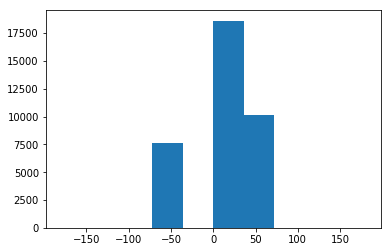

In [111]:
labels_file = augment_flip_image(labels_file, right, left)
calculate_angle_amount()
show_distribution(labels_file, 'angle')


 16%|█▋        | 6672/40503 [00:18<01:56, 290.86it/s]


 97%|█████████▋| 39295/40503 [00:41<00:00, 2750.10it/s]


100%|██████████| 40503/40503 [00:42<00:00, 957.94it/s] 

Numbers of sample after upsampling:  42782
Left: 7594 Right: 16575 Center: 18613


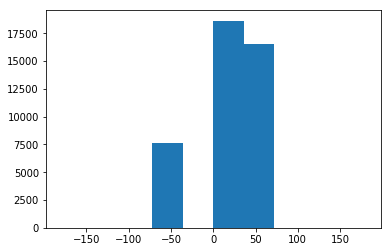

In [119]:
labels_file = augment_duplicate_upsampling(labels_file, right, center)
calculate_angle_amount()
show_distribution(labels_file, 'angle')

In [ ]:
labels_file = augment_duplicate_upsampling(labels_file, left, center)
calculate_angle_amount()
show_distribution(labels_file, 'angle')


 65%|██████▍   | 27606/42782 [01:04<01:08, 221.50it/s]


 81%|████████  | 34466/42782 [01:51<01:46, 77.77it/s]


 97%|█████████▋| 41304/42782 [02:14<00:10, 141.16it/s]

In [ ]:
with open(os.path.join(dataset_path, 'over_sampled_label.json'), 'w', encoding='utf-8') as outfile:
    json.dump(labels_file, outfile, ensure_ascii=False, sort_keys=False, indent=4)
    outfile.write("\n")